*****************************************************
Decision Tree Classifier on a Diabetes dataset
*****************************************************

In [1]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [2]:
dp = r"C:\Users\anany\Downloads\archive (2)\diabetes.csv"
df = pd.read_csv(dp)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df.Outcome


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 


In [5]:

dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)


In [6]:
score = dt.score(X_train, y_train)
score

1.0

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7135416666666666

In [8]:
r2 = metrics.r2_score(y_test, y_pred)
r2

-0.24425592082007785

In [9]:
precision = metrics.precision_score(y_test, y_pred)
precision

0.609375

In [10]:
recall = metrics.recall_score(y_test, y_pred)
recall

0.5652173913043478

In [11]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[98, 25],
       [30, 39]], dtype=int64)

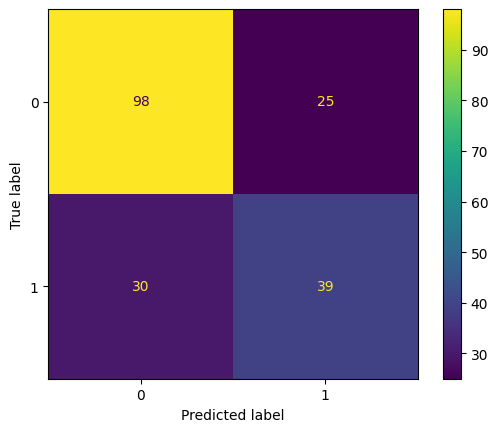

In [12]:
#displaying confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot()

VISUALIZING DECISION TREE USING GRAPHVIZ

In [13]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
os.environ["PATH"] += os.pathsep + r"C:\Users\anany\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin"


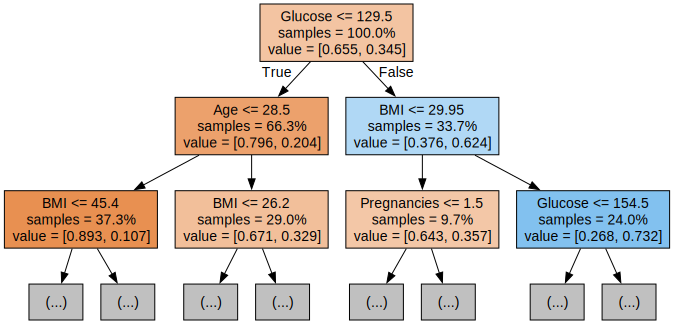

In [14]:
tree = dt
d_data = export_graphviz(tree, feature_names=X_train.columns,  filled=True,  max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(d_data)
display(graph)

*******************************************************************
Random Forest Algorithm using Diabetes dataset
*******************************************************************

In [15]:
import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [16]:
dp = r"C:\Users\anany\Downloads\archive (2)\diabetes.csv"
df = pd.read_csv(dp)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X=df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [19]:
rf = RandomForestClassifier()

# HYPERPARAMETER TUNING
# Using random search to find the best hyperparameters and thus create a more accurate model
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)


rand_search.fit(X_train, y_train)

#calling the best model out of all the models created through random search
best_rf = rand_search.best_estimator_



In [20]:
y_pred = best_rf.predict(X_test)

In [21]:
score = best_rf.score(X_train, y_train)
score

1.0

In [22]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8125

In [23]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.18557794273594908

In [24]:
precision = metrics.precision_score(y_test, y_pred)
precision

0.7619047619047619

In [25]:
recall = metrics.recall_score(y_test, y_pred)
recall

0.6956521739130435

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[108,  15],
       [ 21,  48]], dtype=int64)

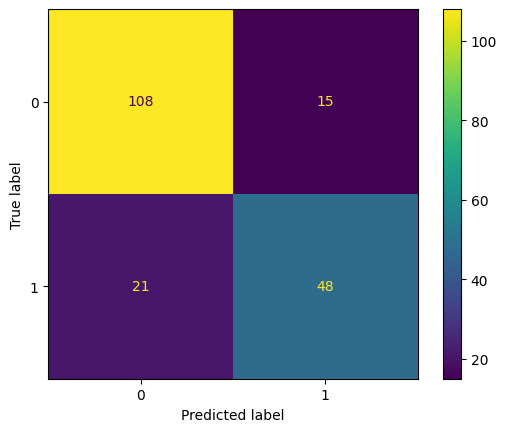

In [27]:
#displaying confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot()

VISUALIZING MODEL USING GRAPHVIZ

In [28]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
os.environ["PATH"] += os.pathsep + r"C:\Users\anany\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin"


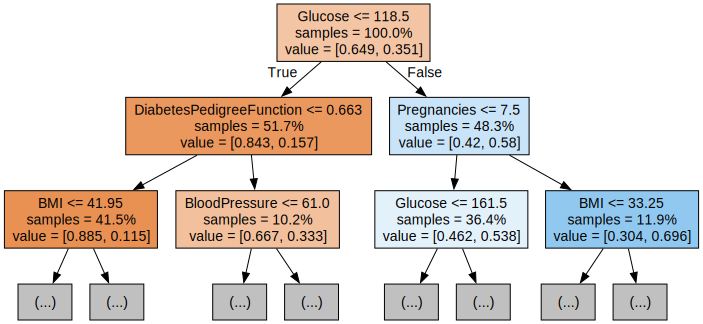

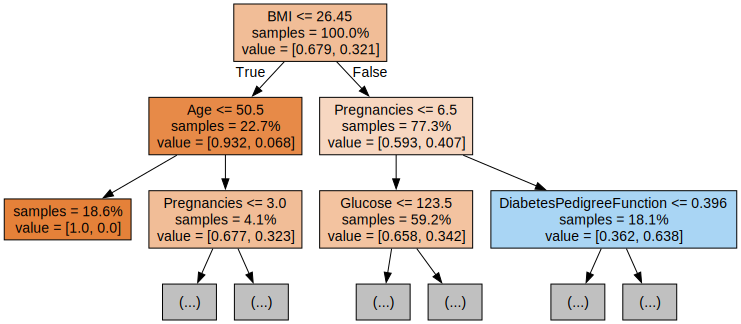

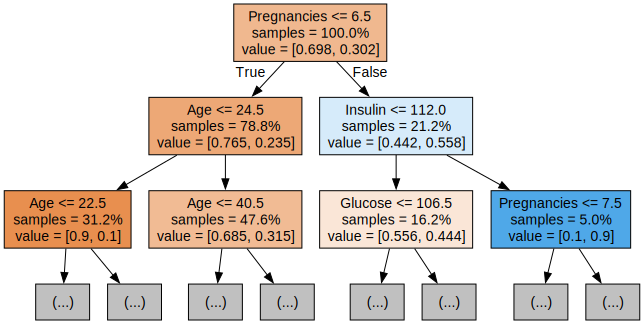

In [29]:
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_train.columns,  filled=True,  max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

EVALUATING IMPORTANCE OF EACH FEATURE AND PLOTTING THE RESULT IN A BAR CHART

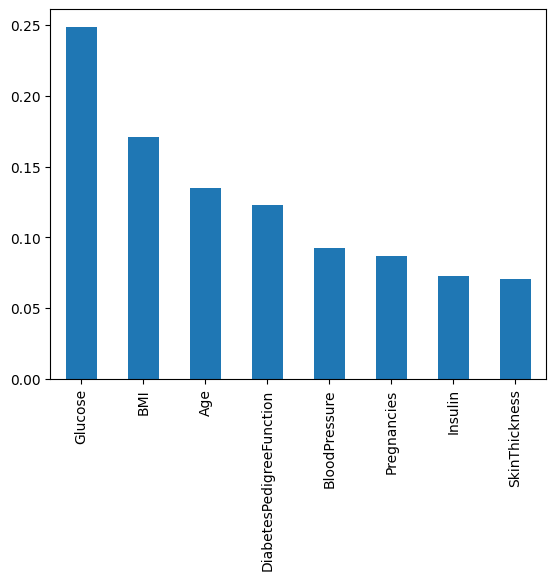

In [30]:
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp.plot.bar();